In [1]:
import pandas as pd
#1 데이터를 로드
df = pd.DataFrame({'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'score': [60, 63, 64, 67, 68, 71, 72, 75, 76, 78]})
X = df[['hours']]
y = df[['score']]

In [2]:
# 팬더스 데이터를 numpy 포맷으로 변환
X = X.to_numpy()
y = y.to_numpy()

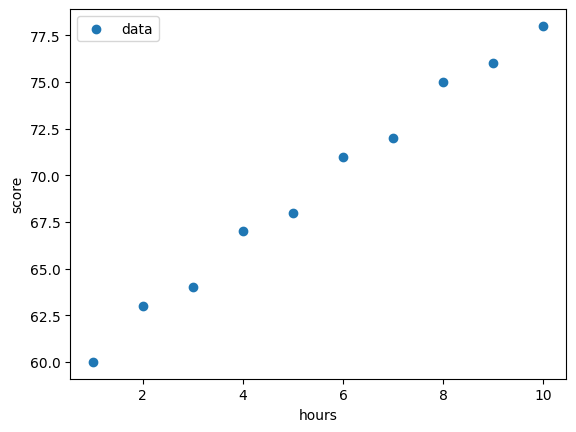

In [3]:
#2 matplotlib으로 데이터 시각화
import matplotlib.pylab as plt
plt.scatter( df['hours'], df['score'], label = "data")

plt.legend(loc = "best")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [4]:
#3 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#train_test_split(y, shuffle=False)

In [5]:
X_train

array([[ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [6]:
#4 선형 회귀 또는 다른 회귀 모델 생성
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()

line_fitter.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = line_fitter.predict(X_test)
y_pred

array([[76.3062201 ],
       [62.37320574],
       [70.33492823],
       [60.38277512]])

In [8]:
#5 모델 정확도 평가, MSE나 MAE 사용
# https://www.sqler.com/board_MachineLearning_AI_tip_lecture/1096470
from sklearn import metrics
# MSE - 에러율
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.26886976030768306


In [9]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  0.49521531100478455


In [10]:
#6 모델을 파일로 저장하고, 다시 파일을 모델을 로드
import joblib
joblib.dump(line_fitter, './reg_model.pkl')

['./reg_model.pkl']

In [11]:
# 모델을 로드하고 예측 실행
loaded_model = joblib.load('reg_model.pkl')
X_test = pd.DataFrame({'hours': [17]}).to_numpy ()  # 14를 df에서 np로 변환하고 predict 수행
y_pred = loaded_model.predict(X_test)
y_pred

array([[92.22966507]])